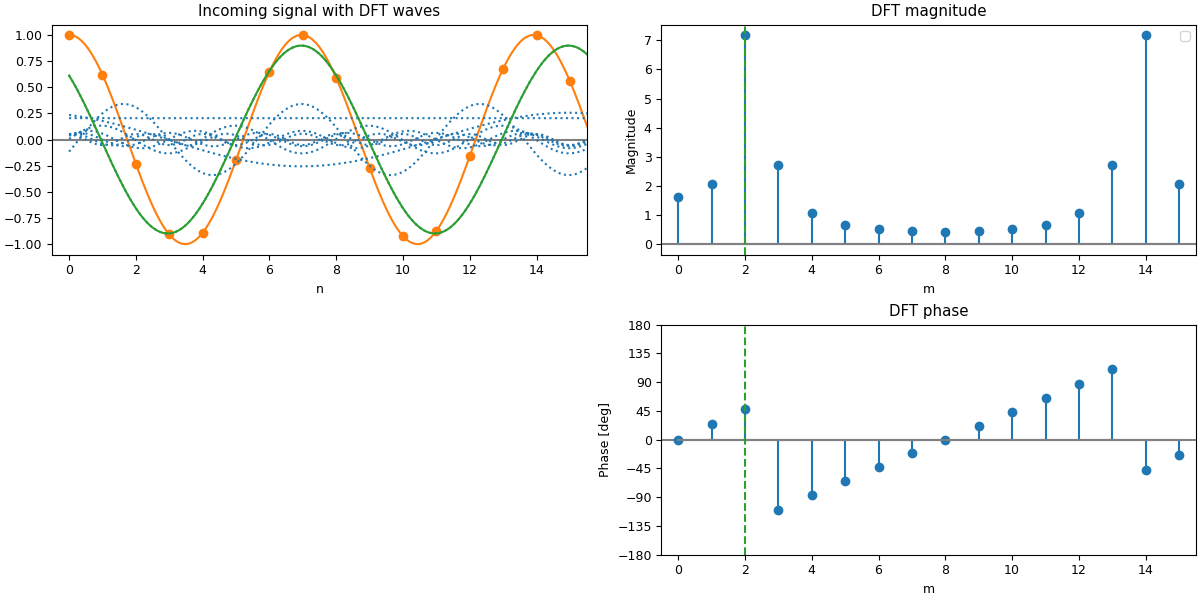

In [1]:
%matplotlib ipympl   
%load_ext autoreload
%autoreload 2
    
import ipywidgets
import dft_leakage

signal = dft_leakage.Signal(initialise_graphs=True, create_widgets=True)
display(signal.widget.layout)

res = ipywidgets.interactive(signal.interact, 
                             m = signal.widget.widget['m'], 
                             k = signal.widget.widget['k'],
                             show_dtft = signal.widget.widget['show_dtft'])